In [12]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle
import PIL.Image as image
import numpy as np

print('IMPORT DONE',end='%')

IMPORT DONE%

In [13]:
datadir = 'Weather'
class_names = []
for i in os.listdir(datadir):
    class_names.append(i)
num_classes = len(class_names)
print(class_names,num_classes)

['Cloudy', 'Foggy', 'Rainy', 'Snowy', 'Sunny'] 5


In [14]:
flat_data_arr=[]
target_arr=[]
for i in class_names:
  path=os.path.join(datadir,i)
  print(f'loaded weather:{i}')
  count =  0
  for img in os.listdir(path):
    if count == 40:
        break
    file_path = os.path.join(path,img)
    img_array = np.array(image.open(file_path)) /255.0
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(class_names.index(i))
    count = count + 1
  print(f'loaded weather:{i} successfully')

loaded weather:Cloudy
loaded weather:Cloudy successfully
loaded weather:Foggy
loaded weather:Foggy successfully
loaded weather:Rainy
loaded weather:Rainy successfully
loaded weather:Snowy
loaded weather:Snowy successfully
loaded weather:Sunny
loaded weather:Sunny successfully


In [15]:
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target 
df

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.774814,0.802735,0.836318,0.755381,0.800518,0.839525,0.747960,0.807493,0.855904,0.754917,...,0.666889,0.666889,0.661084,0.667240,0.667240,0.660893,0.726536,0.726536,0.720188,0
1,0.997556,0.997556,0.997556,0.999892,0.999892,0.999892,1.000000,1.000000,1.000000,1.000000,...,0.448266,0.447223,0.439380,0.427000,0.423450,0.415672,0.399782,0.391826,0.385329,0
2,0.724608,0.636762,0.541971,0.675150,0.620287,0.434633,0.605734,0.519621,0.236605,0.627853,...,0.296133,0.319535,0.312374,0.310114,0.320851,0.320917,0.303292,0.305181,0.303464,0
3,0.942201,0.964084,0.997313,0.943578,0.965461,0.998684,0.943342,0.965840,0.998398,0.941586,...,0.346469,0.335486,0.310940,0.266465,0.228202,0.214838,0.206383,0.186265,0.150993,0
4,0.852245,0.873736,0.915409,0.858862,0.887785,0.924941,0.867968,0.902810,0.930316,0.876230,...,0.524344,0.538785,0.549356,0.523322,0.533124,0.542929,0.508401,0.512409,0.521052,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.307432,0.601550,0.927040,0.309941,0.604059,0.929549,0.313265,0.607684,0.933024,0.303926,...,0.678134,0.382213,0.221783,0.647238,0.350922,0.208052,0.642493,0.346873,0.197987,4
196,0.153482,0.306423,0.537796,0.154830,0.307771,0.539143,0.157126,0.310067,0.541439,0.162947,...,0.212223,0.276062,0.363358,0.188938,0.375977,0.496846,0.213757,0.402334,0.522705,4
197,0.143203,0.348923,0.754469,0.140958,0.347935,0.763409,0.141135,0.349489,0.766825,0.146384,...,0.721732,0.735887,0.726174,0.688388,0.702895,0.694533,0.636466,0.655206,0.653799,4
198,0.461323,0.607778,0.810695,0.453140,0.608426,0.808254,0.451260,0.609391,0.807926,0.457571,...,0.199661,0.273499,0.369744,0.244794,0.288690,0.300853,0.176383,0.220642,0.229549,4


In [16]:
# TRAIN / TEST Data Split
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully


In [17]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.01,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
print("The training of the model is started, please wait for while as it may take few minutes to complete")
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
model.best_params_

The training of the model is started, please wait for while as it may take few minutes to complete
The Model is trained well with the given images


{'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'}

In [18]:
y_pred=model.predict(x_test)
print("The predicted Data is :", y_pred)

The predicted Data is : [2 4 1 3 3 1 3 4 3 3 4 2 4 4 0 3 2 0 4 1 2 3 0 0 0 0 1 0 2 2 2 1 3 0 2 0 0
 4 0 1]


In [19]:
#classification_report(y_pred,y_test)
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
#confusion_matrix(y_pred,y_test)

The model is 60.0% accurate


In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[6 1 1 0 0]
 [3 3 1 0 1]
 [1 0 4 3 0]
 [0 1 2 5 0]
 [1 1 0 0 6]]


In [21]:
print('ALL DONE')

ALL DONE


# Confusion Matrix

In [24]:
import seaborn as sns

Text(0.5, 1.0, 'Accuracy Score: 0.6')

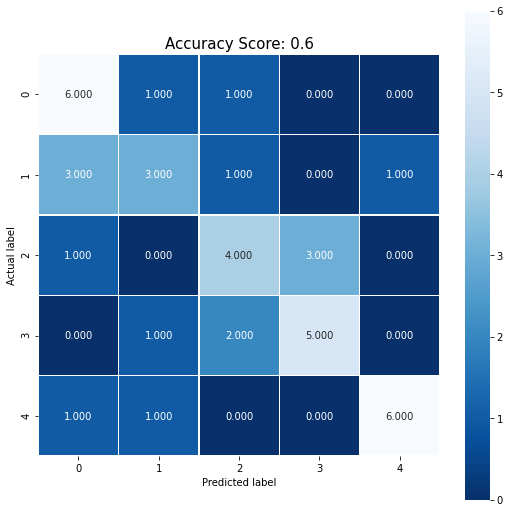

In [26]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,y_pred))
plt.title(all_sample_title,size=15)

# Accuracy Graph

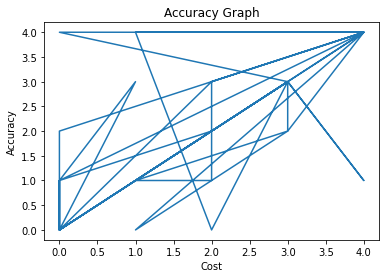

In [34]:
plt.title('Accuracy Graph')
plt.plot(y_pred, y_test)
plt.xlabel('Cost')
plt.ylabel('Accuracy')
plt.show()